# Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Iris Dataset

In [3]:
data=pd.read_csv('Iris.csv')#Reading the data in .csv format
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Drop the Unwanted Columns

In [4]:
data.drop(columns='Id',axis=1,inplace=True) 
#drop command is used to delete a particular column and axis=1 indicates that we are dropping a column

In [5]:
data.head()#Displays the first 5 values of the Iris Dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()#info() method displays the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()# to display stats about data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocess the Data

In [8]:
#Check for null values in the dataset
data.isnull().sum() #There are no null values in the given dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

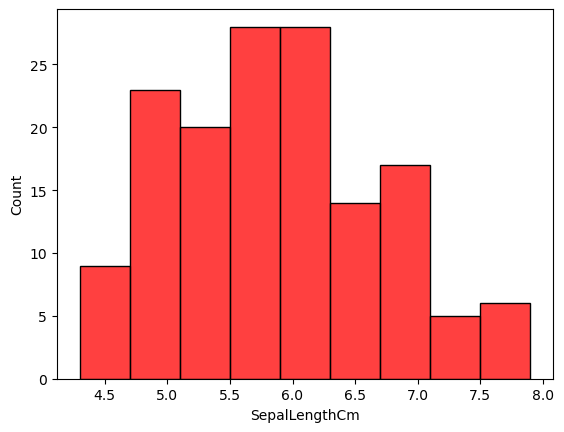

In [9]:
# histograms
sns.histplot(data=data,x='SepalLengthCm',color='Red')

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

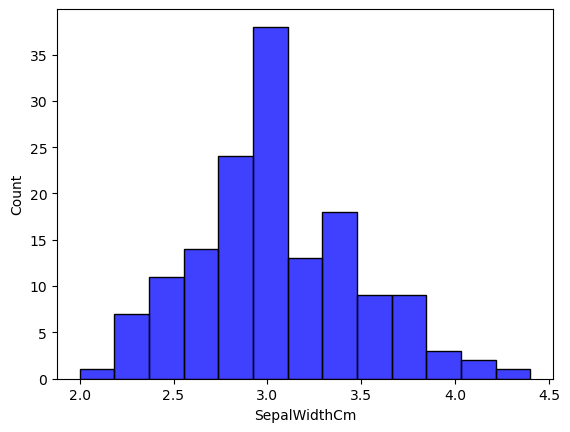

In [10]:
# histograms
sns.histplot(data=data,x='SepalWidthCm',color='Blue')

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

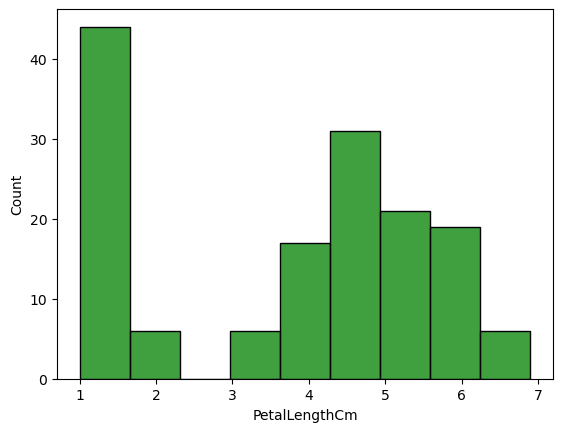

In [11]:
# histograms
sns.histplot(data=data,x='PetalLengthCm',color='Green')

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

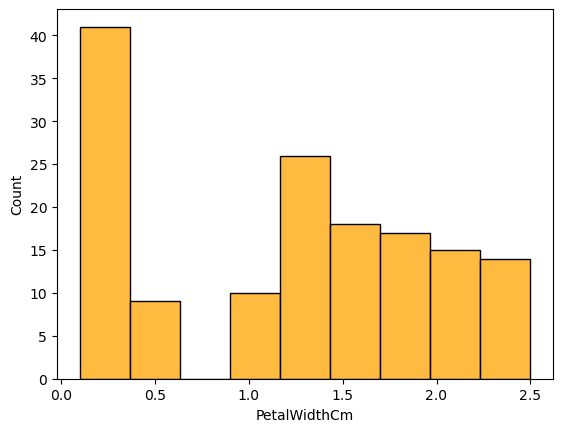

In [12]:
sns.histplot(data=data,x='PetalWidthCm',color='Orange')

In [13]:
#To plot the Species Attribute, It consists of three different types. So let us use Scatter Plot
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

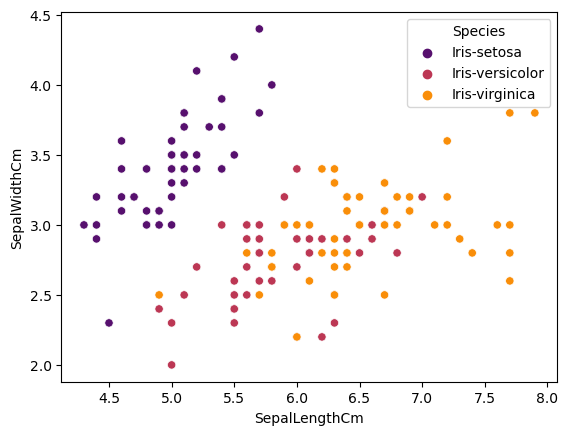

In [14]:
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='inferno')
#by taking SepalLengthCm and SepalWidthCm as x and y axis, we can plot the different species by setting hue='Species'

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

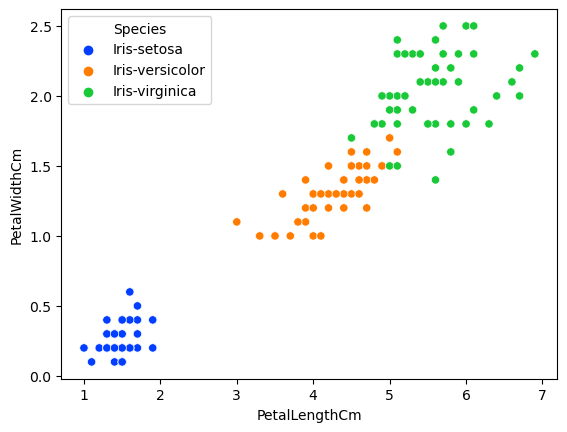

In [15]:
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='bright')
#by taking PetalLengthCm and PetalWidthCm as x and y axis, we can plot the different species by setting hue='Species'

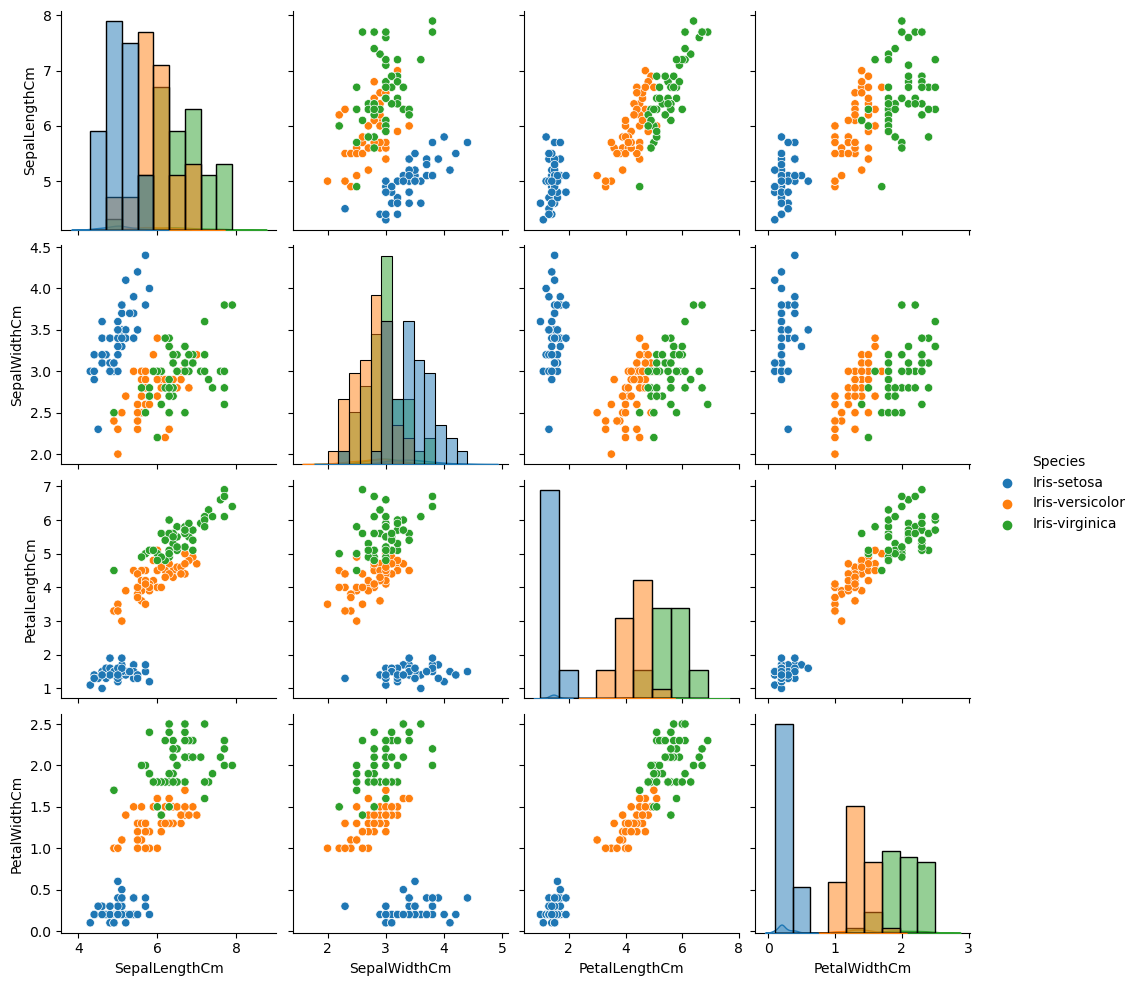

In [16]:
g=sns.pairplot(data=data,hue='Species')
g.map_diag(sns.histplot)
#Pairplot is used to plot and display all the possible combination of the available attribute
#Here the diagonal graphs are plotted as histograms

# Correlation Matrix and Label Encoder


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

One Important thing that should be noted here is, we cannot compute correlation for non-numeric categorical or non-categorical attributes. Here,the Species attribute is of 3-types namely *Iris-Setosa, Iris-Versicolor, Iris-Virginica* 

So,these non-numeric values should be converted to numeric values before finding correlation matrix, for that we can use LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head(5)
#Look at the table, Species Attribute now consists of numeric-values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
iris_corr=data.corr()
iris_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Heat Map

To visualize the correlation matrix in graphical format, HeatMap can be used
When annot is set as true, the correlation coefficient values will be displayed.
In some system, it is not supporting, So I am additionally including a for loop, to display the correlation coefficient values in respective boxes. It is necessary, only if the values are not displayed even after setting annot as True.
I will include it in comments

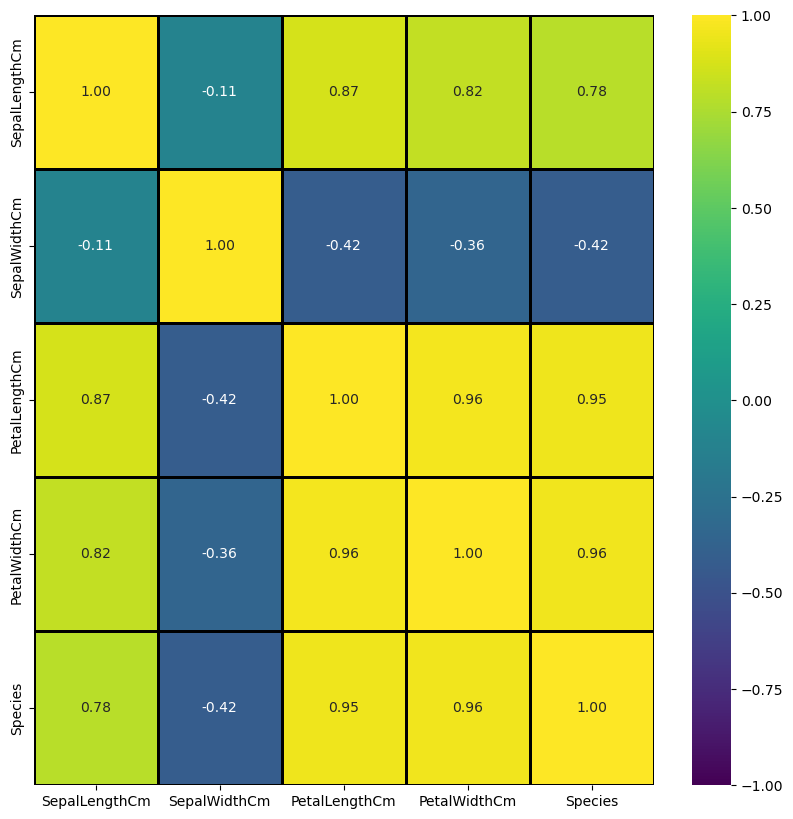

In [19]:
plt.figure(figsize=(10,10))
g=sns.heatmap(iris_corr,annot=True,linecolor='black',linewidths=1,cmap='viridis',fmt=".2f", vmin=-1,vmax=1)
plt.show()

# Model Training

In [20]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Species'])
Y = data['Species']
# With the value of X, We will be predicitng the Target variable Y (i.e) Species
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [79]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=13)
#The function returns tuple with 4 values and eaxh value is unpacked to the 4 variable (i.e) X_train,X_test,y_train and y_test

train_test_split(X, y, test_size=0.2, random_state=42): This function returns a tuple containing four elements - X_train, X_test, y_train, and y_test.

X_train: The features used for training.
X_test: The features used for testing.
y_train: The target labels corresponding to X_train.
y_test: The target labels corresponding to X_test.

Tuple Unpacking:
The tuple returned by train_test_split is being unpacked into the variables on the left side of the assignment statement (X_train, X_test, y_train, y_test).

X_train receives the first element of the tuple (which is the training features).
X_test receives the second element of the tuple (which is the testing features).
y_train receives the third element of the tuple (which is the training target labels).
y_test receives the fourth element of the tuple (which is the testing target labels).


# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression #Logistic Regression is imported
from sklearn.metrics import accuracy_score
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
#Now the model is trained using Logistic Regression, Now Let us Predict with Test variable
# Predictions
logistic_regression_pred = logistic_regression_model.predict(X_test)
# Calculate accuracy
regression_accuracy = (accuracy_score(y_test, logistic_regression_pred))*100
print(f'Regression Accuracy: {regression_accuracy:}')

Regression Accuracy: 97.36842105263158


Let us visualize it by plotting the Result in Graph

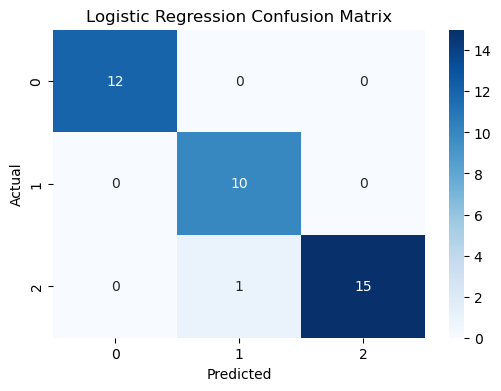

In [81]:
from sklearn.metrics import confusion_matrix
# Plotting confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, logistic_regression_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbor 

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = (accuracy_score(y_test, knn_pred))*100
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:}')

K-Nearest Neighbors Accuracy: 94.73684210526315


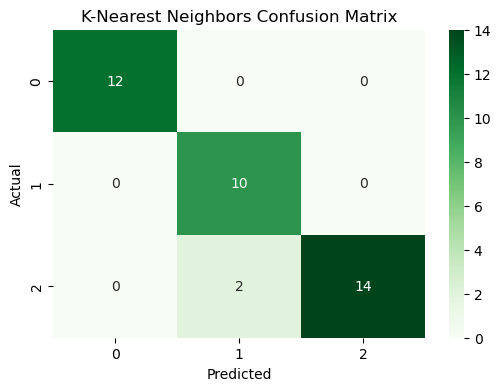

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Greens')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=94, random_state=56)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)*100
print(f'Random Forest Accuracy: {random_forest_accuracy:}')

Random Forest Accuracy: 94.73684210526315


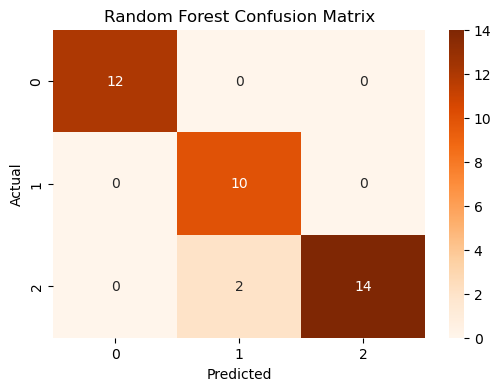

In [93]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, random_forest_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

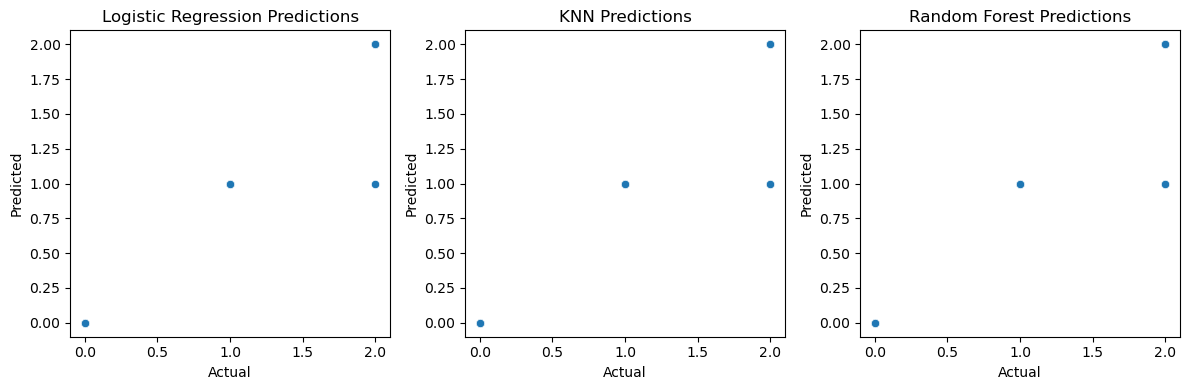

In [94]:
results = pd.DataFrame({'Actual': y_test, 
                        'Logistic Regression': logistic_regression_pred, 
                        'KNN': knn_pred, 
                        'Random Forest': random_forest_pred})

# Scatter plot for Logistic Regression predictions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=results, x='Actual', y='Logistic Regression', palette='Set1')
plt.title('Logistic Regression Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for K-Nearest Neighbors predictions
plt.subplot(1, 3, 2)
sns.scatterplot(data=results, x='Actual', y='KNN', palette='Set2')
plt.title('KNN Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for Random Forest predictions
plt.subplot(1, 3, 3)
sns.scatterplot(data=results, x='Actual', y='Random Forest', palette='Set3')
plt.title('Random Forest Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()